Use digits mnist dataset and fashion mnist dataset to build an Artificial Neural Network (ANN) and Conventional Neural Network (CNN)

In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2023-03-04 16:25:02.519671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
digits = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digits.load_data()

In [3]:
X_train = X_train/255
X_test = X_test/255

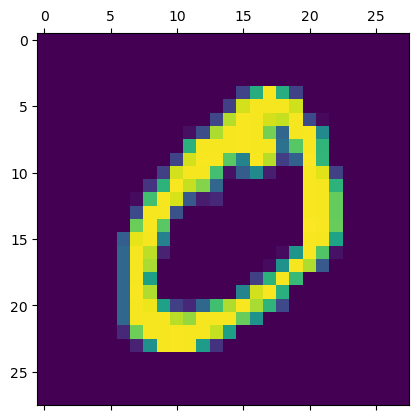

In [4]:
plt.matshow(X_train[1])

In [5]:
y_train[1]

0

In [6]:
X_test.shape

(10000, 28, 28)

# Artificial Neural Network

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2023-03-04 16:25:09.001969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="sparse_categorical_crossentropy",           
              optimizer="adam",
              metrics=["accuracy"])

In [10]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 1s 662us/step - loss: 0.4019 - accuracy: 0.8862


In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 528us/step - loss: 0.2410 - accuracy: 0.9308


[0.2409939020872116, 0.9308000206947327]

In [12]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
confusion_matrix(y_test, y_pred)

313/313 [==============================] - 0s 457us/step


array([[ 954,    0,    0,    1,    1,    9,   10,    3,    2,    0],
       [   0, 1118,    2,    2,    0,    1,    3,    1,    7,    1],
       [   6,    6,  953,    8,   12,    5,    8,    8,   24,    2],
       [   4,    2,   19,  903,    3,   35,    1,   11,   22,   10],
       [   1,    2,    3,    0,  939,    0,    9,    2,    6,   20],
       [   5,    4,    0,   16,    8,  816,    8,    7,   21,    7],
       [   7,    3,    4,    0,   10,   24,  904,    1,    5,    0],
       [   2,    9,   26,    3,    7,    1,    0,  944,    2,   34],
       [   3,    9,    9,   16,   15,   28,    6,   13,  863,   12],
       [  10,    9,    1,    7,   44,    7,    1,   13,    3,  914]])

In [13]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred))


313/313 [==============================] - 0s 459us/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.94      0.92      0.93      1032
           3       0.94      0.89      0.92      1010
           4       0.90      0.96      0.93       982
           5       0.88      0.91      0.90       892
           6       0.95      0.94      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.90      0.89      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [14]:
np.argmax(model.predict(X_test)[0])

313/313 [==============================] - 0s 450us/step


7

In [15]:
print(y_test[0])

7


# Conventional Neural Network

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(30, (3, 3), activation = 'relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [17]:
model.compile(loss="sparse_categorical_crossentropy",           
              optimizer="adam",
              metrics=["accuracy"])

In [18]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2120 - accuracy: 0.9371


In [19]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.93      0.98      0.95       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [20]:
np.argmax(model.predict(X_test)[0])

313/313 [==============================] - 0s 1ms/step


7

In [21]:
print(y_test[0])

7


Use fashion mnist dataset and fashion mnist dataset to build an Artificial Neural Network (ANN) and Conventional Neural Network (CNN)

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


In [23]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
train_labels.shape

(60000,)

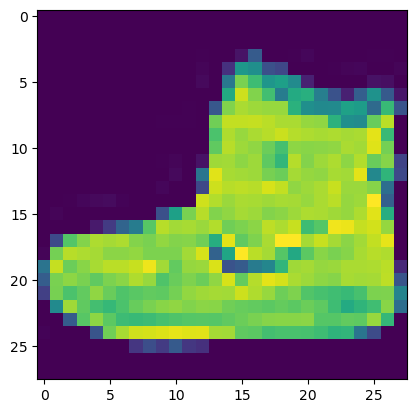

In [27]:
plt.imshow(train_images[0])

In [28]:
train_labels[0]

9

In [29]:
class_names[train_labels[0]]

'Ankle boot'

In [30]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [32]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4742 - accuracy: 0.8303
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3581 - accuracy: 0.8698
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3237 - accuracy: 0.8804
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2987 - accuracy: 0.8884
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2789 - accuracy: 0.8956


In [33]:
class_names[np.argmax(model.predict(test_images)[0])]

313/313 [==============================] - 0s 1ms/step


'Ankle boot'

In [34]:
class_names[test_labels[0]]

'Ankle boot'

In [35]:
model = keras.Sequential([
    keras.layers.Conv2D(30, (3, 3), activation = 'relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [36]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3808 - accuracy: 0.8636
Epoch 2/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.2516 - accuracy: 0.9086
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2035 - accuracy: 0.9254
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1655 - accuracy: 0.9385
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1327 - accuracy: 0.9511


In [37]:
class_names[np.argmax(model.predict(test_images)[0])]

313/313 [==============================] - 2s 6ms/step


'Ankle boot'

In [38]:
class_names[test_labels[0]]

'Ankle boot'

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

i. Build a deep learning model to predict churn rate at bank. <br>
ii. Once model is built, print classification report and analyze precision, recall and f1-score <br>
iii. Improve f1 score in minority class using various techniques such as undersampling, oversampling, ensemble etc


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
import pandas as pd
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [63]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [64]:
df_dropped = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df_dropped.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7583,682,France,Male,26,8,0.00,2,1,0,178373.43,0
3539,667,France,Male,42,6,0.00,1,1,0,88890.05,0
3298,558,Germany,Male,25,10,111363.10,2,1,0,197264.35,0
8712,469,Spain,Male,35,5,0.00,2,1,0,186490.37,0
4440,712,France,Male,32,9,100606.02,1,1,0,165693.06,0


In [65]:
df_dropped.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [66]:
df_with_dummies = pd.get_dummies(data=df_dropped, drop_first=True)
df_with_dummies

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [67]:
df_with_dummies.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

In [68]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = MinMaxScaler()
df_with_dummies[columns_to_scale] = scaler.fit_transform(df_with_dummies[columns_to_scale])
df_with_dummies

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,0,0,1
9996,0.332,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,0,0,1
9997,0.718,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,0
9998,0.844,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,1,0,1


In [69]:
from sklearn.model_selection import train_test_split
X = df_with_dummies.drop("Exited", axis=1)
y = df_with_dummies["Exited"]
X_test, X_train, y_test, y_train= train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [70]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
len(X_train.columns)

11

In [72]:
def ANN(X_train, X_test, y_train, y_test):
    model= keras.Sequential([
        keras.layers.Dense(11, activation='relu', input_dim=11),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(1, activation= 'sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100)
    model.evaluate(X_test, y_test)
    y_pred= np.round(model.predict(X_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return y_pred
     


In [73]:
y_pred = ANN(X_train, X_test, y_train, y_test) 

Epoch 1/100
63/63 [==============================] - 0s 784us/step - loss: 0.5655 - accuracy: 0.7965
Epoch 2/100
63/63 [==============================] - 0s 718us/step - loss: 0.5071 - accuracy: 0.7965
Epoch 3/100
63/63 [==============================] - 0s 725us/step - loss: 0.4912 - accuracy: 0.7965
Epoch 4/100
63/63 [==============================] - 0s 738us/step - loss: 0.4795 - accuracy: 0.7975
Epoch 5/100
63/63 [==============================] - 0s 716us/step - loss: 0.4709 - accuracy: 0.8000
Epoch 6/100
63/63 [==============================] - 0s 880us/step - loss: 0.4653 - accuracy: 0.8020
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.8045
Epoch 8/100
63/63 [==============================] - 0s 681us/step - loss: 0.4575 - accuracy: 0.8065
Epoch 9/100
63/63 [==============================] - 0s 685us/step - loss: 0.4544 - accuracy: 0.8080
Epoch 10/100
63/63 [==============================] - 0s 709us/step - loss: 0.4528 - accuracy

# Undersampling

In [74]:
new_df = pd.concat([X_train, y_train], axis=1)
new_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
1344,0.220,0.297297,0.6,0.476319,0.333333,1,0,0.457789,1,0,0,1
8167,0.726,0.081081,0.7,0.588634,0.000000,1,1,0.607963,1,0,0,0
4747,0.626,0.621622,0.6,0.000000,0.333333,0,1,0.079332,0,1,1,0
5004,0.304,0.527027,0.3,0.404408,0.000000,1,0,0.217804,1,0,0,1
3124,0.820,0.283784,0.6,0.711785,0.000000,1,0,0.335631,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9107,0.610,0.270270,0.9,0.000000,0.000000,0,1,0.452437,0,1,1,0
8249,0.472,0.270270,0.6,0.000000,0.333333,1,1,0.189639,0,0,0,0
8337,0.368,0.310811,0.9,0.000000,0.333333,1,0,0.069305,0,0,1,0
6279,0.814,0.500000,0.9,0.467497,1.000000,1,0,0.470924,0,1,0,1


In [75]:
df_0 = new_df[new_df.Exited==0]
df_1 = new_df[new_df.Exited==1]

In [76]:
len(df_0), len(df_1)

(1593, 407)

In [77]:
df_0 = df_0.sample(407)
df_undersampled = pd.concat([df_0, df_1], axis=0)
df_undersampled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
3526,0.898,0.162162,0.9,0.000000,0.333333,1,0,0.684147,0,0,0,0
8575,0.470,0.364865,0.0,0.000000,0.333333,0,0,0.948451,0,1,1,0
8053,0.672,0.148649,0.3,0.738862,0.000000,1,0,0.323368,1,0,1,0
6623,0.462,0.135135,0.3,0.415976,0.000000,1,1,0.149645,0,0,1,0
4456,0.388,0.297297,0.8,0.000000,0.333333,1,0,0.307878,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8379,0.168,0.500000,0.6,0.000000,0.000000,0,1,0.367787,0,1,1,1
7223,0.898,0.175676,0.9,0.616134,0.000000,0,1,0.443009,1,0,1,1
1046,0.914,0.324324,0.1,0.000000,0.000000,1,0,0.082453,0,1,0,1
1487,0.720,0.445946,0.4,0.373287,0.000000,0,1,0.707012,0,1,0,1


In [78]:
X = df_undersampled.drop("Exited", axis=1)
y = df_undersampled["Exited"]
ANN(X, X_test,y, y_test)

Epoch 1/100
26/26 [==============================] - 0s 895us/step - loss: 0.6929 - accuracy: 0.4902
Epoch 2/100
26/26 [==============================] - 0s 767us/step - loss: 0.6925 - accuracy: 0.4939
Epoch 3/100
26/26 [==============================] - 0s 760us/step - loss: 0.6924 - accuracy: 0.5025
Epoch 4/100
26/26 [==============================] - 0s 753us/step - loss: 0.6923 - accuracy: 0.5012
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5074
Epoch 6/100
26/26 [==============================] - 0s 762us/step - loss: 0.6920 - accuracy: 0.5098
Epoch 7/100
26/26 [==============================] - 0s 715us/step - loss: 0.6918 - accuracy: 0.5111
Epoch 8/100
26/26 [==============================] - 0s 723us/step - loss: 0.6915 - accuracy: 0.5098
Epoch 9/100
26/26 [==============================] - 0s 714us/step - loss: 0.6911 - accuracy: 0.5184
Epoch 10/100
26/26 [==============================] - 0s 732us/step - loss: 0.6907 - accuracy

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [79]:
df_0 = new_df[new_df.Exited==0]
df_1 = new_df[new_df.Exited==1]

In [80]:
len(df_0), len(df_1)

(1593, 407)

In [81]:
df_1 = df_1.sample(1593, replace=True)

In [82]:
len(df_0), len(df_1)

(1593, 1593)

In [83]:
df_oversampled = pd.concat([df_0, df_1])
df_oversampled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
8167,0.726,0.081081,0.7,0.588634,0.000000,1,1,0.607963,1,0,0,0
4747,0.626,0.621622,0.6,0.000000,0.333333,0,1,0.079332,0,1,1,0
2090,0.634,0.283784,0.9,0.000000,0.333333,1,0,0.344344,0,1,1,0
3298,0.416,0.094595,1.0,0.443858,0.333333,1,0,0.986358,1,0,1,0
9485,1.000,0.256757,0.4,0.351302,0.000000,1,0,0.548290,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4619,0.716,0.391892,0.0,0.504544,0.333333,0,1,0.663656,0,0,0,1
7337,0.652,0.216216,0.8,0.330449,0.000000,1,0,0.459073,0,0,0,1
118,0.348,0.175676,0.8,0.429731,0.000000,1,0,0.998664,1,0,0,1
1447,0.694,0.513514,0.5,0.441622,0.000000,1,1,0.251118,0,1,1,1


In [84]:
X = df_oversampled.drop("Exited", axis=1)
y = df_oversampled["Exited"]
ANN(X, X_test,y, y_test)

Epoch 1/100
100/100 [==============================] - 0s 741us/step - loss: 0.7039 - accuracy: 0.5050
Epoch 2/100
100/100 [==============================] - 0s 676us/step - loss: 0.6758 - accuracy: 0.5860
Epoch 3/100
100/100 [==============================] - 0s 659us/step - loss: 0.6548 - accuracy: 0.6312
Epoch 4/100
100/100 [==============================] - 0s 663us/step - loss: 0.6285 - accuracy: 0.6591
Epoch 5/100
100/100 [==============================] - 0s 649us/step - loss: 0.6118 - accuracy: 0.6695
Epoch 6/100
100/100 [==============================] - 0s 680us/step - loss: 0.6008 - accuracy: 0.6745
Epoch 7/100
100/100 [==============================] - 0s 652us/step - loss: 0.5912 - accuracy: 0.6811
Epoch 8/100
100/100 [==============================] - 0s 643us/step - loss: 0.5830 - accuracy: 0.6830
Epoch 9/100
100/100 [==============================] - 0s 649us/step - loss: 0.5764 - accuracy: 0.6830
Epoch 10/100
100/100 [==============================] - 0s 642us/step - l

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

# Oversample SMOTE

In [85]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [86]:
ANN(X_sm, X_test,y_sm, y_test)

Epoch 1/100
100/100 [==============================] - 0s 887us/step - loss: 0.6679 - accuracy: 0.6055
Epoch 2/100
100/100 [==============================] - 0s 922us/step - loss: 0.6474 - accuracy: 0.6315
Epoch 3/100
100/100 [==============================] - 0s 785us/step - loss: 0.6333 - accuracy: 0.6453
Epoch 4/100
100/100 [==============================] - 0s 772us/step - loss: 0.6239 - accuracy: 0.6516
Epoch 5/100
100/100 [==============================] - 0s 704us/step - loss: 0.6171 - accuracy: 0.6563
Epoch 6/100
100/100 [==============================] - 0s 689us/step - loss: 0.6108 - accuracy: 0.6635
Epoch 7/100
100/100 [==============================] - 0s 755us/step - loss: 0.6049 - accuracy: 0.6685
Epoch 8/100
100/100 [==============================] - 0s 901us/step - loss: 0.6002 - accuracy: 0.6723
Epoch 9/100
100/100 [==============================] - 0s 691us/step - loss: 0.5940 - accuracy: 0.6820
Epoch 10/100
100/100 [==============================] - 0s 700us/step - l

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

# Ensemble

In [87]:
df_0 = new_df[new_df.Exited==0]
df_1 = new_df[new_df.Exited==1]
len(df_0), len(df_1)

(1593, 407)

In [88]:
1593//407

3

In [89]:
lst_ensemble = []
for i in range(3):
    df_ensemble = pd.concat([df_0.sample(407), df_1])
    lst_ensemble.append(df_ensemble)

In [90]:
lst_ensemble[2]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
1227,0.414,0.135135,0.7,0.583684,0.333333,1,0,0.921619,0,0,0,0
4998,0.418,0.297297,0.7,0.575815,0.000000,1,1,0.094541,0,1,0,0
2892,0.502,0.351351,0.3,0.000000,0.333333,1,0,0.152992,0,0,1,0
7090,0.502,0.391892,0.1,0.256798,0.333333,0,1,0.482578,0,0,1,0
7551,0.552,0.256757,0.2,0.533958,0.333333,1,0,0.743461,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8379,0.168,0.500000,0.6,0.000000,0.000000,0,1,0.367787,0,1,1,1
7223,0.898,0.175676,0.9,0.616134,0.000000,0,1,0.443009,1,0,1,1
1046,0.914,0.324324,0.1,0.000000,0.000000,1,0,0.082453,0,1,0,1
1487,0.720,0.445946,0.4,0.373287,0.000000,0,1,0.707012,0,1,0,1


In [91]:
X = lst_ensemble[0].drop("Exited", axis=1)
y = lst_ensemble[0]["Exited"]
y_pred1= ANN(X, X_test,y, y_test)

Epoch 1/100
26/26 [==============================] - 1s 849us/step - loss: 0.6920 - accuracy: 0.5295
Epoch 2/100
26/26 [==============================] - 0s 765us/step - loss: 0.6874 - accuracy: 0.5577
Epoch 3/100
26/26 [==============================] - 0s 722us/step - loss: 0.6838 - accuracy: 0.5811
Epoch 4/100
26/26 [==============================] - 0s 761us/step - loss: 0.6807 - accuracy: 0.5885
Epoch 5/100
26/26 [==============================] - 0s 737us/step - loss: 0.6771 - accuracy: 0.6118
Epoch 6/100
26/26 [==============================] - 0s 729us/step - loss: 0.6733 - accuracy: 0.6253
Epoch 7/100
26/26 [==============================] - 0s 710us/step - loss: 0.6686 - accuracy: 0.6425
Epoch 8/100
26/26 [==============================] - 0s 703us/step - loss: 0.6633 - accuracy: 0.6437
Epoch 9/100
26/26 [==============================] - 0s 724us/step - loss: 0.6577 - accuracy: 0.6486
Epoch 10/100
26/26 [==============================] - 0s 713us/step - loss: 0.6524 - accura

In [92]:
X = lst_ensemble[1].drop("Exited", axis=1)
y = lst_ensemble[1]["Exited"]
y_pred2 = ANN(X, X_test,y, y_test)

Epoch 1/100
26/26 [==============================] - 0s 874us/step - loss: 0.6888 - accuracy: 0.5479
Epoch 2/100
26/26 [==============================] - 0s 777us/step - loss: 0.6837 - accuracy: 0.5553
Epoch 3/100
26/26 [==============================] - 0s 736us/step - loss: 0.6788 - accuracy: 0.5565
Epoch 4/100
26/26 [==============================] - 0s 717us/step - loss: 0.6743 - accuracy: 0.5860
Epoch 5/100
26/26 [==============================] - 0s 696us/step - loss: 0.6703 - accuracy: 0.6007
Epoch 6/100
26/26 [==============================] - 0s 689us/step - loss: 0.6672 - accuracy: 0.6167
Epoch 7/100
26/26 [==============================] - 0s 712us/step - loss: 0.6649 - accuracy: 0.6265
Epoch 8/100
26/26 [==============================] - 0s 699us/step - loss: 0.6625 - accuracy: 0.6290
Epoch 9/100
26/26 [==============================] - 0s 688us/step - loss: 0.6605 - accuracy: 0.6302
Epoch 10/100
26/26 [==============================] - 0s 695us/step - loss: 0.6588 - accura

In [93]:
X = lst_ensemble[2].drop("Exited", axis=1)
y = lst_ensemble[2]["Exited"]
y_pred3 = ANN(X, X_test,y, y_test)

Epoch 1/100
26/26 [==============================] - 0s 851us/step - loss: 0.6927 - accuracy: 0.5012
Epoch 2/100
26/26 [==============================] - 0s 755us/step - loss: 0.6897 - accuracy: 0.5074
Epoch 3/100
26/26 [==============================] - 0s 764us/step - loss: 0.6881 - accuracy: 0.5197
Epoch 4/100
26/26 [==============================] - 0s 733us/step - loss: 0.6863 - accuracy: 0.5418
Epoch 5/100
26/26 [==============================] - 0s 708us/step - loss: 0.6845 - accuracy: 0.5725
Epoch 6/100
26/26 [==============================] - 0s 697us/step - loss: 0.6827 - accuracy: 0.5848
Epoch 7/100
26/26 [==============================] - 0s 701us/step - loss: 0.6807 - accuracy: 0.5835
Epoch 8/100
26/26 [==============================] - 0s 721us/step - loss: 0.6786 - accuracy: 0.5909
Epoch 9/100
26/26 [==============================] - 0s 695us/step - loss: 0.6767 - accuracy: 0.5934
Epoch 10/100
26/26 [==============================] - 0s 703us/step - loss: 0.6741 - accura

In [94]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred_final)):
    num = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if num >= 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0


In [95]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75      6370
           1       0.35      0.78      0.48      1630

    accuracy                           0.66      8000
   macro avg       0.63      0.70      0.62      8000
weighted avg       0.80      0.66      0.69      8000



Train a word2vec model on the Amazon datasets in kaggle. Once you train a model on this, find the words most similar to 'awful' and find similarities between the following word tuples: ('good', 'great'), ('slow','steady')

In [58]:
import gensim
import pandas as pd

In [96]:
df = pd.read_csv("Reviews.csv")

In [97]:
df.head(4)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative


In [98]:
review_text= df.review.apply(gensim.utils.simple_preprocess)

In [99]:
review_text.head(4)

0    [one, of, the, other, reviewers, has, mentione...
1    [wonderful, little, production, br, br, the, f...
2    [thought, this, was, wonderful, way, to, spend...
3    [basically, there, family, where, little, boy,...
Name: review, dtype: object

In [100]:
review_text.loc[0,]

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 'oz',
 'episode',
 'you',
 'll',
 'be',
 'hooked',
 'they',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me',
 'br',
 'br',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'this',
 'is',
 'not',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word',
 'br',
 'br',
 'it',
 'is',
 'called',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focuses'

In [101]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=8
)

In [102]:
model.build_vocab(review_text)

In [103]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)


(42464068, 55882335)

In [104]:
model.wv.most_similar("awful")

[('terrible', 0.8957457542419434),
 ('horrible', 0.8515822291374207),
 ('dreadful', 0.8344962000846863),
 ('atrocious', 0.8152419328689575),
 ('lousy', 0.7886127233505249),
 ('horrendous', 0.780099630355835),
 ('horrid', 0.7773901224136353),
 ('pathetic', 0.7631842494010925),
 ('abysmal', 0.7559261918067932),
 ('bad', 0.7551819086074829)]

In [105]:
model.wv.similarity(w1="good", w2="great")

0.730798

In [106]:
model.wv.similarity(w1="slow", w2="steady")


0.45198363

Movie reviews are present as individual text file (one file per review) in review folder. <br>

Folder structure looks like this, <br>

reviews <br>
    |__ positive <br>
        |__pos_1.txt <br>
        |__pos_2.txt <br>
        |__pos_3.txt <br>
    |__ negative
        |__neg_1.txt <br>
        |__neg_2.txt <br>
        |__neg_3.txt <br>
You need to read these reviews using tf.data.Dataset and perform following transformations, <br>

Read text review and generate a label from folder name. your dataset should have review text and label as a tuple <br>
Filter blank text review. Two files are blank in this dataset <br>
Do all of the above transformations in single line of code. Also shuffle all the reviews <br>

In [2]:
import tensorflow as tf

2023-03-04 17:22:33.478132: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
reviews_dataset = tf.data.Dataset.list_files('reviews/*/*', shuffle=False)

2023-03-04 17:22:38.807278: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
train_size = int(len(reviews_dataset)*0.8)
train_dataset = reviews_dataset.take(train_size)
test_dataset = reviews_dataset.skip(train_size)

In [5]:
import os
def extract_review_and_label(file_path):
    return tf.io.read_file(file_path), tf.strings.split(file_path, os.path.sep)[-2]


In [8]:
final_train_dataset = train_dataset.map(extract_review_and_label).filter(lambda review, label: review!="").shuffle(3).prefetch(tf.data.AUTOTUNE).cache()
final_test_dataset = test_dataset.map(extract_review_and_label).filter(lambda review, label: review!="").shuffle(3)
for review, label in final_train_dataset.as_numpy_iterator():
    print("Review:",review)
    print("Label:",label)

Review: b"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect for the original cast that made this show such a huge success. As it is now, the show is just awful. I can't believe it's still on the air.\n"
Label: b'negative'
Review: b"One of the other review